#**Выявление ключевых слов в англоязычных текстах по теме "Education"**

*Education Today*  is a business magazine targeting the entire education sector from primary to adult education.

https://www.education-today.co.uk/



---


*Keyword Extraction with BERT* - a minimal method for extracting keywords and keyphrases
 
https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea



---
**Шаг 1.**  *Установка библиотек и импорта модулей*








In [ ]:
# устанавиливаем библиотеки и модули 
! pip3 install requests # для парсинга сайтов
! pip3 install beautifulsoup4 # для удобной работы с html-тегами
! pip3 install sentence-transformers # для Keyword Extraction


In [ ]:
# импортируем необходимые модули для парсинга сайта
import requests
from bs4 import BeautifulSoup

# импортируем необходимые модули для формирования датафрейма
import pandas as pd

# импортируем необходимые модули для предпроцессинга и лемматизации текстов
import nltk
import string
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")
stop_words = stopwords.words('english')
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

# импортируем необходимые модули для визуализации
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# импортируем необходимые модули для извлечения ключевых слов (Keyword Extraction) с помощью KeyBERT
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens') # можно также использовать модель xlm-r-distilroberta-base-paraphase-v1 (не сработало)
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Шаг 2.**  *Парсинг англоязычного сайта журнала "Education Today"*



In [ ]:
# функция для обработки URL-адресов страниц
def get_soup(url, **kwargs):
    response = requests.get(url, **kwargs)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, features='html.parser')
    else:
        soup = None
    return soup

In [ ]:
# функция для сбора ссылок на страницы со статьями на сайте журнала "Education Today"
# принимает на вход количество страниц со статьями, а на выходе возвращает список ссылок на статьи с этих страниц

def crawl_links_en(pages_count):
    urls = []
    fmt = 'https://www.education-today.co.uk/category/news/page/{page}/' # шаблон URL-адреса страницы со статьями

    for page_n in range(1, 1 + pages_count):
        print('page: {}'.format(page_n))

        page_url = fmt.format(page=page_n)
        soup = get_soup(page_url)
        if soup is None:
            break

        for tag in soup.select(' .more-link'): # CSS-селектор cсылки на статью
            href = tag.attrs['href']
            url = '{}'.format(href)
            urls.append(url)

    return urls

In [ ]:
# функция для парсинга текста статей журнала "Education Today"
# принимает список URL-адресов, парсит необходимую информацию по каждой статье и добавляет её в общий массив data, который и возвращает

def parse_links_en(urls):
    data = []

    for url in urls:
        soup = get_soup(url)
        if soup is None:
            break

        title = soup.select_one('title').text.strip() # сохраняем заголовок статьи 
        article_url = url # сохраняем ссылку на статью
        article_text = ' '.join([soup.find('div', {'class': 'entry'}).text.strip()]) # сохраняем текст статьи как строку
        article_category = []
        for tag in soup.find_all('a', rel="category tag"): 
            article_category.append(tag.text.strip()) # сохраняем список тематических категорий статьи
        date = soup.find('p', {'class': 'post-meta'}).find('span', {'class': 'tie-date'}).text.strip() # сохраняем дату публикации


        item = {
            'Title': title,
            'Category': article_category,
            'Date': date,
            'Link': url,
            'Text': article_text,
        }
        data.append(item)

# чтобы сохранить результат используем метод pd.DataFrame(), где аргументом подадим словарь из полученных данных
    result = pd.DataFrame(data)
    
    return result    

In [ ]:
# Собираем информацию с сайта газеты "Education Today Magazine". 

articles_dataset_en_5May2021 = parse_links_en(crawl_links_en(53)) # собираем ссылки, а потом информацию о статьях (по данным на 5.06.2021 на сайте всего 53 страницы с новостями)
articles_dataset_en_5May2021.to_csv('articles_dataset_en_5May2021.csv', index=False) #сохраняем полученные данные в формат csv
articles_dataset_en_5May2021


page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10
page: 11
page: 12
page: 13
page: 14
page: 15
page: 16
page: 17
page: 18
page: 19
page: 20
page: 21
page: 22
page: 23
page: 24
page: 25
page: 26
page: 27
page: 28
page: 29
page: 30
page: 31
page: 32
page: 33
page: 34
page: 35
page: 36
page: 37
page: 38
page: 39
page: 40
page: 41
page: 42
page: 43
page: 44
page: 45
page: 46
page: 47
page: 48
page: 49
page: 50
page: 51
page: 52
page: 53


,Title,Category,Date,Link,Text
0,Whizz Education quantifies maths lockdown lear...,"[Coronavirus, Maths, News, Partner content]",3 days ago,https://www.education-today.co.uk/whizz-educat...,"Whizz Education, provider of the leading virtu..."
1,Virtual Schools Archery League supports Covid-...,"[Educational event, News, Outdoor learning / s...",3 days ago,https://www.education-today.co.uk/virtual-scho...,"A brand-new Virtual Schools Archery League, la..."
2,Students across the UK learn how to negotiate ...,"[Diversity, Further Education, Health, Hygiene...",1 week ago,https://www.education-today.co.uk/students-acr...,Tens of thousands of students age 14-19 across...
3,Dagenham school wins gold mental health award ...,"[Awards, Community engagement, Mental health, ...",2 weeks ago,https://www.education-today.co.uk/dagenham-sch...,All Saints School in Dagenham has landed a gol...
4,STEM sessions open up new world for Fylde Coas...,"[Careers, Educational event, News, Science, Se...",2 weeks ago,https://www.education-today.co.uk/stem-session...,A careers project has enabled Fylde Coast stud...
...,...,...,...,...,...
516,School finalists revealed for the Apps for Goo...,"[Awards, Computing, News]","June 10, 2014",https://www.education-today.co.uk/school-final...,Apps for Good has today announced the finalist...
517,First World War project for children launched ...,"[News, Teaching resources]","June 9, 2014",https://www.education-today.co.uk/first-world-...,‘The war to end all wars’ is the subject of a ...
518,Inaugural Beanstalk Ball raises over £170K for...,"[Literacy, News]","June 6, 2014",https://www.education-today.co.uk/inaugural-be...,"Over 200 people who could read and write, incl..."
519,Vocab Express to partner with Language Show Li...,"[Competition, News]","June 5, 2014",https://www.education-today.co.uk/vocab-expres...,"Online vocabulary learning application, Vocab ..."



---
**Шаг 3.**  *Предобработка текстов из англоязычного датасета*




In [ ]:
# загружаем полученный файл 
from google.colab import files
uploaded = files.upload()

Saving articles_dataset_en_5May2021.csv to articles_dataset_en_5May2021 (1).csv


In [ ]:
# откроем получившийся файл csv и сохраним все тексты статей из таблицы в привычный питонский список

en_df = pd.read_csv('articles_dataset_en_5May2021.csv', encoding="utf-8") 
list_en_texts = list(en_df["Text"].values) 
 
print(type(list_en_texts)) # проверяем тип переменной
list_en_texts

<class 'list'>


['Whizz Education, provider of the leading virtual tutor Maths-Whizz, has quantified the lockdown learning loss in maths experienced by 5–13-year-olds in the UK. Whizz Education’s research shows that 46% of the 1,721 children assessed experienced a learning loss, exhibiting an average of knowledge decline of eight months during the first lockdown.\nDr Junaid Mubeen, Director of Education explains: “Learning loss is such a loaded term. At Whizz we simply take it to mean a decline in students’ knowledge levels, which is hardly surprising in the face of severe disruptions this past year. Despite the tireless efforts of teachers to adapt lessons and provide remote classes, the global pandemic has had a drastic effect on pupils’ learning. “We found that pencil and paper multiplication was the skill that fared worst, along with pencil and paper addition, both demonstrating more than six months of knowledge declines across the sample.\n“Knowledge declines were less severe in topics such as in

In [ ]:
# функция для предобработки и лемматизации текста

def preprocess_en_lemmatize(text):

  lower_text = text.lower() # приводим все слова к нижнему регистру
  no_links_text = re.sub(r'https?:\/\/.*[\r\n]*', '', lower_text)  # убираем все ссылки, начинающиеся с https
  no_links_text2 = re.sub(r'www\.\S+\.\S+[\r\n]*', '', no_links_text)  # убираем все ссылки, начинающиеся с www
  no_links_text3 = re.sub(r'\(?\S+\.\S+\.?\S+?[\r\n]*', '', no_links_text2)  # убираем все ссылки без www
  no_email_text = re.sub(r'\S+@\S+', '', no_links_text3)  # убираем все адреса email
  no_extra_punct = re.sub('[0-9‘’–‑“”£•®]', '', no_email_text)  # убираем нетипичные знаки пунктуации и цифры (при необходимости можно увеличить список вручную)
  text_without_punct = no_extra_punct.translate(str.maketrans('', '', string.punctuation)) # убираем пунктуацию из текста
  text_tokens = word_tokenize(text_without_punct, language="english") # токенизируем текст превращая его в список 
  
  #filtered_tokens = [word for word in text_tokens if word not in stop_words] # доп.строка чтобы убрать стоп слова
  # при необходимости ее использования изменить  text_tokens в следующей строке на filtered_tokens
  
  text_lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in text_tokens])  # лемматизируем токенизированный список и возвращаем его как строку 

  return text_lemmatized

In [ ]:
# функция для предобработки списка текстов и сохранения в новый список

def get_en_list_preprocessed (texts):

  data = []
  
  for text in texts:
    text_preprocessed = preprocess_en_lemmatize(text)

    data.append(text_preprocessed)

  return data


In [ ]:
# предобрабатываем тексты статей из таблицы и сохраняем их в список

list_en_texts_preprocessed = get_en_list_preprocessed(list_en_texts)
list_en_texts_preprocessed 


['whizz education provider of the leading virtual tutor mathswhizz ha quantified the lockdown learning loss in math experienced by yearolds in the uk whizz education research show that of the child assessed experienced a learning loss exhibiting an average of knowledge decline of eight month during the first lockdown dr junaid mubeen director of education explains learning loss is such a loaded term at whizz we simply take it to mean a decline in student knowledge level which is hardly surprising in the face of severe disruption this past year despite the tireless effort of teacher to adapt lesson and provide remote class the global pandemic ha had a drastic effect on pupil learning we found that pencil and paper multiplication wa the skill that fared worst along with pencil and paper addition both demonstrating more than six month of knowledge decline across the sample knowledge decline were le severe in topic such a integer power and root and also decimal month learning loss child st



---


**Шаг 4.**  *Выявление ключевых слов с помощью метода KeyBERT* 


In [ ]:
# функция для векторизации текста и обучения модели для трансформации

def keyword_model (doc):

  n_gram_range = (1, 1) # количество ключевых слов/словосочетаний (можно менять количество)
  stop_words = "english"

  count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc]) # извлекаем ключевые слова/фразы-кандидаты
  candidates = count.get_feature_names() # получаем список строк с кандидатами

  # применение предобученной модели для трансформации 

  doc_embedding = model.encode([doc])
  candidate_embeddings = model.encode(candidates)

  # вычисление косинусной близости 
  top_n = 10 # количество наиболее важных ключевых слов
  distances = cosine_similarity(doc_embedding, candidate_embeddings)
  keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
  
  return keywords

In [ ]:
# функция получения ключевых слов списка текстов

def keyword_list(texts):
  
  data = []
  
  for text in texts:
    keywords = keyword_model(text)

    data.append(keywords)

  return data

In [ ]:
# применяем функцию для получения списка ключевых слов текстов статей газеты "Education Today Magazine" 

keyword_list_en = keyword_list(list_en_texts_preprocessed)
keyword_list_en

[['sad',
  'lockdown',
  'studying',
  'class',
  'pandemic',
  'math',
  'tutoring',
  'tutor',
  'teacher',
  'mathswhizz'],
 ['ceo',
  'compete',
  'competition',
  'competing',
  'july',
  'competitive',
  'weekend',
  'june',
  'homeschooling',
  'archery'],
 ['education',
  'manager',
  'imogen',
  'helplines',
  'new',
  'sussex',
  'teacher',
  'university',
  'online',
  'student'],
 ['evelyn',
  'parent',
  'carnegie',
  'celebrated',
  'catholic',
  'wellbeing',
  'worklife',
  'teacher',
  'excelling',
  'headteacher'],
 ['lecturer',
  'student',
  'class',
  'teaching',
  'coaching',
  'teacher',
  'university',
  'planetarium',
  'phd',
  'science'],
 ['educational',
  'parliament',
  'student',
  'website',
  'ceo',
  'charity',
  'online',
  'teacher',
  'webinars',
  'classroom'],
 ['abbot',
  'improving',
  'professional',
  'practising',
  'selfevaluation',
  'revising',
  'reaffirmed',
  'ofsted',
  'education',
  'headteacher'],
 ['edtech',
  'networking',
  'colle

---
**Шаг 5**  *Обновление датафрейма* 

In [ ]:
# добавляем полученные результаты в датафрейм и сохраняем его под новым именем

upgraded_en_dataframe = en_df.assign(Text_preprocessed=list_en_texts_preprocessed,
                                     Keywords=keyword_list_en)
upgraded_en_dataframe.to_csv('en_articles_keywords_dataset_5May2021.csv', index=False) #сохраняем полученные данные в формат csv

display(upgraded_en_dataframe)

,Title,Category,Date,Link,Text,Text_preprocessed,Keywords
0,Whizz Education quantifies maths lockdown lear...,"['Coronavirus', 'Maths', 'News', 'Partner cont...",3 days ago,https://www.education-today.co.uk/whizz-educat...,"Whizz Education, provider of the leading virtu...",whizz education provider of the leading virtua...,"[sad, lockdown, studying, class, pandemic, mat..."
1,Virtual Schools Archery League supports Covid-...,"['Educational event', 'News', 'Outdoor learnin...",3 days ago,https://www.education-today.co.uk/virtual-scho...,"A brand-new Virtual Schools Archery League, la...",a brandnew virtual school archery league launc...,"[ceo, compete, competition, competing, july, c..."
2,Students across the UK learn how to negotiate ...,"['Diversity', 'Further Education', 'Health, Hy...",1 week ago,https://www.education-today.co.uk/students-acr...,Tens of thousands of students age 14-19 across...,ten of thousand of student age across the uk a...,"[education, manager, imogen, helplines, new, s..."
3,Dagenham school wins gold mental health award ...,"['Awards', 'Community engagement', 'Mental hea...",2 weeks ago,https://www.education-today.co.uk/dagenham-sch...,All Saints School in Dagenham has landed a gol...,all saint school in dagenham ha landed a gold ...,"[evelyn, parent, carnegie, celebrated, catholi..."
4,STEM sessions open up new world for Fylde Coas...,"['Careers', 'Educational event', 'News', 'Scie...",2 weeks ago,https://www.education-today.co.uk/stem-session...,A careers project has enabled Fylde Coast stud...,a career project ha enabled fylde coast studen...,"[lecturer, student, class, teaching, coaching,..."
...,...,...,...,...,...,...,...
516,School finalists revealed for the Apps for Goo...,"['Awards', 'Computing', 'News']","June 10, 2014",https://www.education-today.co.uk/school-final...,Apps for Good has today announced the finalist...,apps for good ha today announced the finalist ...,"[barclaycard, ninja, samsung, innovation, ceo,..."
517,First World War project for children launched ...,"['News', 'Teaching resources']","June 9, 2014",https://www.education-today.co.uk/first-world-...,‘The war to end all wars’ is the subject of a ...,the war to end all war is the subject of a new...,"[website, online, centenary, newsreel, downloa..."
518,Inaugural Beanstalk Ball raises over £170K for...,"['Literacy', 'News']","June 6, 2014",https://www.education-today.co.uk/inaugural-be...,"Over 200 people who could read and write, incl...",over people who could read and write including...,"[champagne, generosity, auctioneer, ceo, grand..."
519,Vocab Express to partner with Language Show Li...,"['Competition', 'News']","June 5, 2014",https://www.education-today.co.uk/vocab-expres...,"Online vocabulary learning application, Vocab ...",online vocabulary learning application vocab e...,"[ipad, website, university, saturday, online, ..."


---
**Шаг 6**  *Визуализация полученных данных* 

In [ ]:
# загружаем финальный датафрейм для визуализации

from google.colab import files
uploaded = files.upload()

In [ ]:
# если загружаем данные из датафрейма, то получаем список списков, преобразуем его в простой список

en_df_kw = pd.read_csv('en_articles_keywords_dataset_5May2021.csv', encoding="utf-8") 
kw = en_df_kw["Keywords"].values

keyword_list = re.sub('[\[\]\,\']','', (''.join(kw))).split() # превращаем список списков в строку, удаляем знаки пунктуации и превращаем обратно в список
keyword_list

['sad',
 'lockdown',
 'studying',
 'class',
 'pandemic',
 'math',
 'tutoring',
 'tutor',
 'teacher',
 'mathswhizzceo',
 'compete',
 'competition',
 'competing',
 'july',
 'competitive',
 'weekend',
 'june',
 'homeschooling',
 'archeryeducation',
 'manager',
 'imogen',
 'helplines',
 'new',
 'sussex',
 'teacher',
 'university',
 'online',
 'studentevelyn',
 'parent',
 'carnegie',
 'celebrated',
 'catholic',
 'wellbeing',
 'worklife',
 'teacher',
 'excelling',
 'headteacherlecturer',
 'student',
 'class',
 'teaching',
 'coaching',
 'teacher',
 'university',
 'planetarium',
 'phd',
 'scienceeducational',
 'parliament',
 'student',
 'website',
 'ceo',
 'charity',
 'online',
 'teacher',
 'webinars',
 'classroomabbot',
 'improving',
 'professional',
 'practising',
 'selfevaluation',
 'revising',
 'reaffirmed',
 'ofsted',
 'education',
 'headteacheredtech',
 'networking',
 'college',
 'keynote',
 'university',
 'website',
 'online',
 'microsoft',
 'april',
 'ceotrainee',
 'developmental',
 'h

In [ ]:
# если работаем с полученной переменной из прошлого шага
# функция для объединения всех ключевых слов в один список

def listmerge(lstlst):
    data=[]
    for lst in lstlst:
        for el in lst:
            data.append(el)
    return data

# применяем функцию к списку списков keywords

my_list = listmerge(keyword_list_en)
my_list

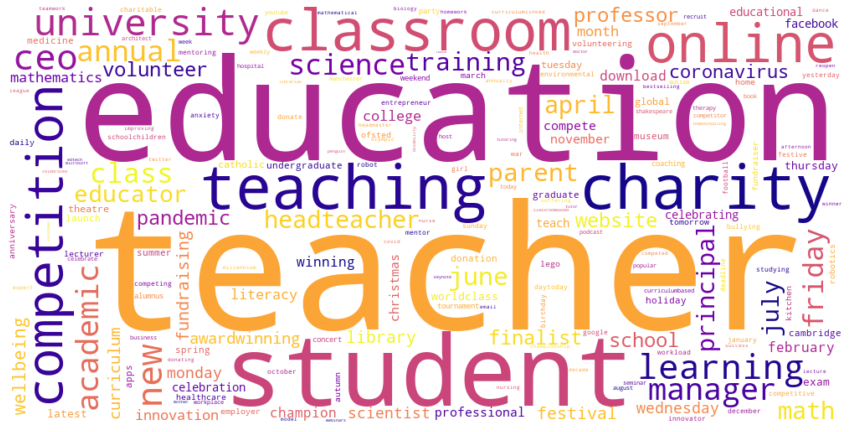

In [ ]:
# Создаем стандартный WordCloud для визуализации данных

word_could_dict=Counter(my_list) # преобразует список слов в словарь с количеством их употребления

wordcloud = WordCloud(width = 1000, height = 500, background_color="white", colormap='plasma').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("education_keywords.png") # сохраняем в файл

In [ ]:
# загружаем файл картинки для того, чтобы сделать облако в форме изображения (формат .png) 
# если цвет фона не белый (225), то применить функцию замены цвета из раздела Extra
from google.colab import files
uploaded = files.upload()

Saving studhat.png to studhat (1).png


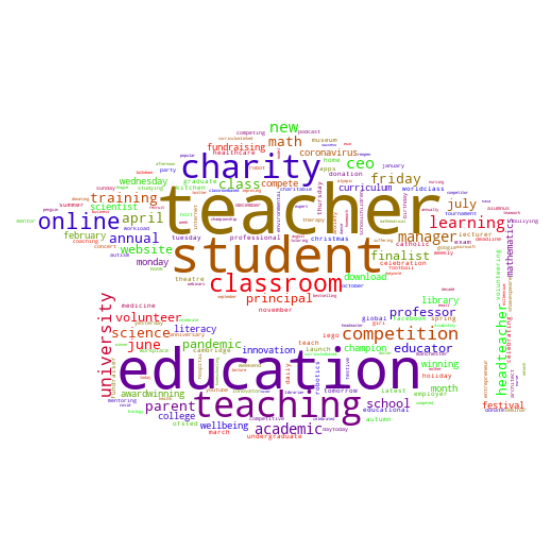

In [ ]:
# Создаем WordCloud в форме картинки
cloud_mask = np.array(Image.open("studhat (1).png")) # открываем загруженную картинку

wordcloud_masked = WordCloud(background_color="white", mask=cloud_mask, colormap='brg').generate_from_frequencies(word_could_dict)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud_masked, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_masked.to_file("education_keywords_masked.png") # сохраняем в файл


#**Выявление ключевых слов в русскоязычных текстах по теме "Образование"**

Журнал *Вестник образования* в настоящее время является официальным изданием Минпросвещения России. Журнал имеет почти столетнюю историю: он был создан в 1922 году, а с марта 2019 года выходит в свет в цифровом формате. 

 https://vestnik.edu.ru/


**Шаг 3.**  *Парсинг русскоязычного сайта журнала "Вестник Образования"*


In [ ]:
# функция для сбора ссылок на страницы сайта журнала "Вестник образования"
# принимает на вход количество страниц со статьями, а на выходе возвращает список ссылок на эти страниц

def crawl_page_links_ru(pages_count):
    urls = []
    fmt = 'https://vestnik.edu.ru/news?page={page}/' # шаблон URL-адреса страницы со статьями

    for page_n in range(1, 1 + pages_count):
        print('page: {}'.format(page_n))

        page_url = fmt.format(page=page_n)
        urls.append(page_url)
        
    return urls 


In [ ]:
# функция для сбора метаданных и ссылок на страницы со статьями и их текста на сайте журнала "Вестник образования"

def parse_page_links_ru(urls):
    article_urls = []
    article_titles = []
    article_summaries = []
    article_dates = []
    article_texts = []

    for url in urls:
        soup = get_soup(url)
        if soup is None:
            break

        for tag in soup.find_all('div', {'class': 'col-12 col-md-8'}): # находим один тег в котором хранится ссылка на статью, чтобы избежать дублирования
            tagsoup = tag
            for tag in tagsoup.select(' .news-list-item__link'): # сохраняем ссылку на статью
                href = tag.attrs['href']
                url = 'https://vestnik.edu.ru{}'.format(href)
                article_urls.append(url)         
        
        for tag in soup.select(' .news-list-item__title'): # сохраняем заголовок статьи
            title = tag.text            
            article_titles.append(title)        
        
        for tag in soup.select(' .news-list-item__summary'): # сохраняем описание статьи
            summary = tag.text
            article_summaries.append(summary)
        
        for tag in soup.find_all('time', {'class': 'news-list-item__date'}): # сохраняем дату публикации
            date = tag.text.strip()           
            article_dates.append(date)

    for url in article_urls: # обращаемся к полученным ссылкам на статью, чтобы сохранить для каждой текст
        soup = get_soup(url)
        if soup is None:
            break

        for tag in soup.find_all('section', {'class': 'topic-detail__description mt-3 mb-5'}): # сохраняем текст публикаций
            text = tag.text.strip()           
            article_texts.append(text)

# чтобы сохранить результат используем метод pd.DataFrame(), где аргументом подадим словарь из полученных данных
    result = pd.DataFrame({
                'Title': article_titles,
                'Date': article_dates,
                'Summary': article_summaries,
                'Link': article_urls,
                'Text': article_texts,
            })
    
    return result

In [ ]:
# Собираем информацию с сайта журнала "Вестник образования". 

articles_dataset_ru_5May2021 = parse_page_links_ru(crawl_page_links_ru(125)) # cобираем информацию по статьям (по данным на 5.06.2021 на сайте всего 136 страницы с новостями)
articles_dataset_ru_5May2021.to_csv('125articles_dataset_ru_3May2021.csv', index=False) #сохраняем полученные данные в формат csv
articles_dataset_ru_5May2021 


page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10
page: 11
page: 12
page: 13
page: 14
page: 15
page: 16
page: 17
page: 18
page: 19
page: 20
page: 21
page: 22
page: 23
page: 24
page: 25
page: 26
page: 27
page: 28
page: 29
page: 30
page: 31
page: 32
page: 33
page: 34
page: 35
page: 36
page: 37
page: 38
page: 39
page: 40
page: 41
page: 42
page: 43
page: 44
page: 45
page: 46
page: 47
page: 48
page: 49
page: 50
page: 51
page: 52
page: 53
page: 54
page: 55
page: 56
page: 57
page: 58
page: 59
page: 60
page: 61
page: 62
page: 63
page: 64
page: 65
page: 66
page: 67
page: 68
page: 69
page: 70
page: 71
page: 72
page: 73
page: 74
page: 75
page: 76
page: 77
page: 78
page: 79
page: 80
page: 81
page: 82
page: 83
page: 84
page: 85
page: 86
page: 87
page: 88
page: 89
page: 90
page: 91
page: 92
page: 93
page: 94
page: 95
page: 96
page: 97
page: 98
page: 99
page: 100
page: 101
page: 102
page: 103
page: 104
page: 105
page: 106
page: 107
page: 108
page: 109
page: 110
page: 11

KeyboardInterrupt: ignored

# Extra

In [ ]:
# Cделать статистику по корпусу https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658

# Sample corpus.
from nltk.corpus import inaugural
corpus = inaugural.raw('1789-Washington.txt')
print(corpus)


from nltk.tokenize import word_tokenize,sent_tokenize
sents = nltk.sent_tokenize(corpus)
print("The number of sentences is", len(sents))
words = nltk.word_tokenize(corpus)
print("The number of tokens is", len(words))
average_tokens = round(len(words)/len(sents))
print("The average number of tokens per sentence is",average_tokens)
unique_tokens = set(words)
print("The number of unique tokens are", len(unique_tokens))
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
final_tokens = []
for each in words:
 if each not in stop_words:
    final_tokens.append(each)
print("The number of total tokens after removing stopwords are", len((final_tokens)))

In [ ]:
# Extra если цвет фона не белый (225), то применить функцию замены ниже

cloud_mask = np.array(Image.open("studhat.png"))
cloud_mask # проверим цвет фона

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_cloud_mask = np.ndarray((cloud_mask.shape[0],cloud_mask.shape[1]), np.int32)

for i in range(len(cloud_mask)):
    transformed_cloud_mask[i] = list(map(transform_format, cloud_mask[i]))

transformed_cloud_mask

In [ ]:
# Extra ячейка для проверки парсинга сайта 

url1 = 'https://vestnik.edu.ru/news/50-protsentov-pedagogov-tomskoi-oblasti-proidet-pereobuchenie-do-2025-goda'  
page1 = requests.get(url1) #res/r/response
page1 # проверим ответ от сайта

soup1 = BeautifulSoup(page1.text, 'html.parser') #сохраним результат в переменную soup
print(soup1.prettify()) # показывает нашу страницу в красивом виде

#пробуем доставать тэги
for tag in soup1.find_all('section', class_="topic-detail__description mt-3 mb-5"):
    print(tag.text)
